# Homework 6 (30 marks)
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW6_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission.

NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/09/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name'))

Import all the libraries you require in the cell below.



In [ ]:
# Enter your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix

### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

1A

In [ ]:
# Enter your code here
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

There are a total of 22 columns in which 21 are independent variables (features) and 1 is the dependent variable (label). The dependent variable is class. There are no null values and all the features are object data type.

1B

In [ ]:
y_temp = df["class"]
X_temp = df.drop("class", axis = 1)
print("X shape before one hot encoding", X_temp.shape, "Y shape before one hot encoding", y_temp.shape)

X shape before one hot encoding (8124, 22) Y shape before one hot encoding (8124,)


1C

In [ ]:
X = pd.get_dummies(X_temp)
dic = {"e" :1, "p" : 0}
df["class"] = df["class"].replace(dic)
df
y = df["class"]
print("X shape after one hot encoding", X.shape, "Y shape after one hot encoding", y.shape)

X shape after one hot encoding (8124, 117) Y shape after one hot encoding (8124,)


0 = poisonous, 1 = edible

1D

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2020, stratify = y)
print("X train shape", X_train.shape, ", X test shape", X_test.shape, ", y train shape", y_train.shape, ", y test shape", y_test.shape)


X train shape (5686, 117) , X test shape (2438, 117) , y train shape (5686,) , y test shape (2438,)


1E

In [ ]:
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth=6, random_state=2020)
dtc = dtc.fit(X_train, y_train) 

In [ ]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0])

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



In [ ]:
# Enter your code here
confusion_matrix(y_test, y_pred)

array([[1175,    0],
       [   0, 1263]])

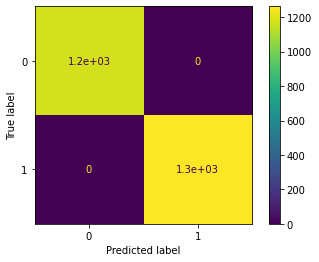

In [ ]:
plot_confusion_matrix(dtc, X_test, y_test)
plt.show()

3. Print the accuracy on the training partition?  (2 marks)


In [ ]:
# Enter your code here
y_train_pred = dtc.predict(X_train)
accuracy_score(y_train, y_train_pred)

1.0

4. Print the accuracy on the test partition? (2 marks)


In [ ]:
# Enter your code here
accuracy_score(y_test, y_pred)

1.0

5. Show the classification tree and save it (5 marks)


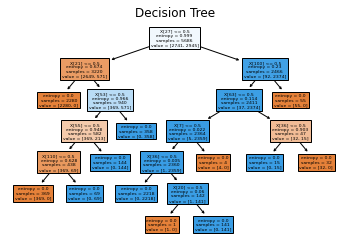

<Figure size 432x288 with 0 Axes>

In [ ]:
# Enter your code here

fig = plot_tree(dtc, filled=True)
plt.title("Decision Tree")
plt.figure()
plt.savefig('clftree.jpg')
plt.show()


6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [ ]:
#print(dict(zip(X.columns, dtc.feature_importances_)))
dic = dict(zip(X.columns, dtc.feature_importances_))
print(dict(sorted(dic.items(), key = lambda x: x[1], reverse=True)))


{'odor_n': 0.5180844693160762, 'bruises_t': 0.22223946002169548, 'stalk-root_c': 0.06284002256767389, 'spore-print-color_r': 0.05118655023253437, 'stalk-root_r': 0.048626897604456064, 'habitat_d': 0.04844976747852385, 'stalk-surface-below-ring_y': 0.03200915755486689, 'gill-size_n': 0.008189443064581354, 'cap-surface_g': 0.006862566149870103, 'bruises_f': 0.0015116660097218722, 'cap-shape_b': 0.0, 'cap-shape_c': 0.0, 'cap-shape_f': 0.0, 'cap-shape_k': 0.0, 'cap-shape_s': 0.0, 'cap-shape_x': 0.0, 'cap-surface_f': 0.0, 'cap-surface_s': 0.0, 'cap-surface_y': 0.0, 'cap-color_b': 0.0, 'cap-color_c': 0.0, 'cap-color_e': 0.0, 'cap-color_g': 0.0, 'cap-color_n': 0.0, 'cap-color_p': 0.0, 'cap-color_r': 0.0, 'cap-color_u': 0.0, 'cap-color_w': 0.0, 'cap-color_y': 0.0, 'odor_a': 0.0, 'odor_c': 0.0, 'odor_f': 0.0, 'odor_l': 0.0, 'odor_m': 0.0, 'odor_p': 0.0, 'odor_s': 0.0, 'odor_y': 0.0, 'gill-attachment_a': 0.0, 'gill-attachment_f': 0.0, 'gill-spacing_c': 0.0, 'gill-spacing_w': 0.0, 'gill-size_b': 

Odor, bruises, and stalk root are the top three most important features for determining toxicity. Especially mushrooms features with no odor,  bruises, and club stalk root.

7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
# Enter your code here
dictionary = {"cap-shape_x": 1, "cap-surface_s": 1, "cap-color_n": 1, "bruises_t": 1, "odor_y":1,	"gill-attachment_f":1, "gill-spacing_c":1, "gill-size_n":1,	"gill-color_k":1,	"stalk-shape_e":1, "stalk-root_e":1, "stalk-surface-above-ring_s":1,	"stalk-surface-below-ring_s":1,	"stalk-color-above-ring_w": 1,	"stalk-color-below-ring_w":1,	"veil-type_p":1,	"veil-color_w":1,	"ring-number_o":1,	"ring-type_p":1,	"spore-print-color_r":1,	"population_s":1,	"habitat_u":1}

In [ ]:
t = X[:0]
t = t.append(dictionary, ignore_index=True)
t= t.fillna(0)
pred = dtc.predict(np.array(t))
pred

array([0])

This mushroom is poisonous as predicted by the model.